In [44]:
import torch.nn as nn
import torch 
import pandas as pd
from numpy import sqrt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import seaborn as sns
import seaborn
import sklearn
import matplotlib

check current versions of libraries 

In [45]:
#print(seaborn.__version__)
#print(torch.__version__)
#print(pd.__version__)
#print(np.__version__)
#print(sklearn.__version__)
#print(matplotlib.__version__)
#!python -V

0.11.0


load the data 

In [37]:
math = pd.read_csv('math.csv')

In [38]:
math = math.drop(columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'])
#print(math)
#math = math.drop(columns=['activities', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'])

In [ ]:
#port = pd.read_csv('por.csv')
#port = port.drop(columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'])
#port = port.drop(columns=['activities', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'])

check the dimension of input data for future configuration of the network

In [39]:
inputDim = len(math.columns) - 1
print(inputDim)

27


In [40]:
noRows = math.shape[0]
print(noRows)

395


split the variables

In [41]:
X = np.array([i[:inputDim] for i in math.values.tolist()])
#print(X)
y = np.array([i[-1] for i in math.values.tolist()])
#print(y)

create a network with 2 hidden layers and 2 activation functions(sigmoid and relu)

In [42]:

class NeuralNet(nn.Module):
    #network configuration
    def __init__(self, inputDim):
        super(NeuralNet, self).__init__()
        #structure
        self.fc1 = nn.Linear(inputDim, 15)
        self.fc2 = nn.Linear(15, 7)
        self.fc3 = nn.Linear(7, 1)
        #activation functions
        self.sigmoid = torch.nn.Sigmoid()
        self.ReLU = torch.nn.ReLU()

    #forward propagation
    def forward(self, x):
        #first layer
        x = self.fc1(x)
        x = self.sigmoid(x)
        #second layer
        x = self.fc2(x)
        x = self.ReLU(x)
        #third layer
        output = self.fc3(x)
        return output


initialize the network and other properties 

In [28]:
network = NeuralNet(inputDim)
#optimise using stochastic gradient descent
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(network.parameters(), lr = 0.01, momentum=0.5)
print(network.eval())

NeuralNet(
  (fc1): Linear(in_features=27, out_features=15, bias=True)
  (fc2): Linear(in_features=15, out_features=7, bias=True)
  (fc3): Linear(in_features=7, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (ReLU): ReLU()
)


implement a KFold Cross Validation for better results

In [29]:
kf = KFold(n_splits=10)
print(kf.get_n_splits(X))
print(kf)

10
KFold(n_splits=10, random_state=None, shuffle=False)


create an array with train losses for all the epochs

'''
X_train, X_test = torch.tensor(X[:310]).float(), torch.tensor(X[:310]).float()
y_train, y_test = torch.tensor(y[:310]).float(), torch.tensor(y[310:]).float()
optimizer.zero_grad()
epochs = 30   
firstLossArray = []
for epoch in range(epochs):
    #clear gradient
    optimizer.zero_grad()
    #compute model output
    y_pred = network(X_train)
    loss = criterion(y_pred.squeeze(), y_train)
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    firstLossArray.append(loss.item())
    #credit assigment
    loss.backward()
    #update model weights
    optimizer.step()
    
    

plt.plot(firstLossArray, c='b')
plt.xlabel('Epochs')
plt.ylabel('Train loss')
plt.figure()
plt.show()
'''

In [14]:
lossArray = []

In [15]:
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = torch.tensor(X[train_index]).float(), torch.tensor(X[test_index]).float()
    y_train, y_test = torch.tensor(y[train_index]).float(), torch.tensor(y[test_index]).float()
    optimizer.zero_grad()

    epochs = 30
    for epoch in range(epochs):
        #clear gradient
        optimizer.zero_grad()
        #compute model output
        y_pred = network(X_train)
        loss = criterion(y_pred.squeeze(), y_train)
        print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
        lossArray.append(loss.item())
        #credit assigment
        loss.backward()
        #update model weights
        optimizer.step()
    
    y_Pred = network(X_test)
    afterTrain = criterion(y_Pred.squeeze(), y_test)
    print('test loss after training MSE', afterTrain.item())
    print('test loss after training RMSE', sqrt(afterTrain.item()))
    print('r squared', r2_score(y_test.detach().numpy(), y_Pred.detach().numpy()))
        
    

Epoch 0: train loss: 7.329375267028809
Epoch 1: train loss: 5.391777515411377
Epoch 2: train loss: 5.098537445068359
Epoch 3: train loss: 5.290496349334717
Epoch 4: train loss: 6.335014343261719
Epoch 5: train loss: 9.52396297454834
Epoch 6: train loss: 12.56798267364502
Epoch 7: train loss: 9.930880546569824
Epoch 8: train loss: 5.280985355377197
Epoch 9: train loss: 5.30851411819458
Epoch 10: train loss: 6.251679420471191
Epoch 11: train loss: 5.9458537101745605
Epoch 12: train loss: 5.361039161682129
Epoch 13: train loss: 4.32145357131958
Epoch 14: train loss: 3.966651439666748
Epoch 15: train loss: 3.873577356338501
Epoch 16: train loss: 3.7948784828186035
Epoch 17: train loss: 3.7647407054901123
Epoch 18: train loss: 3.7324438095092773
Epoch 19: train loss: 3.7454895973205566
Epoch 20: train loss: 3.840444803237915
Epoch 21: train loss: 4.0852766036987305
Epoch 22: train loss: 4.565882682800293
Epoch 23: train loss: 5.214489936828613
Epoch 24: train loss: 5.536664009094238
Epoch 2

check final results after training 

In [16]:
y_Pred = network(X_test)
afterTrain = criterion(y_Pred.squeeze(), y_test)
print('test loss after training MSE', afterTrain.item())
print('test loss after training RMSE', sqrt(afterTrain.item()))
print('r squared', r2_score(y_test.detach().numpy(), y_Pred.detach().numpy()))

test loss after training MSE 1.6900293827056885
test loss after training RMSE 1.3000113009915293
r squared 0.9150348892444925


In [17]:
#print(lossArray)

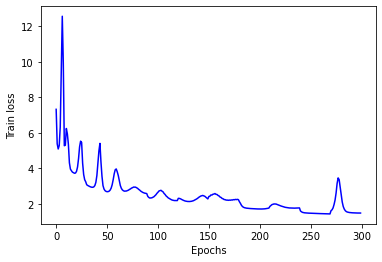

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(lossArray, c='b')
plt.xlabel('Epochs')
plt.ylabel('Train loss')
plt.figure()
plt.show()

check the correlation

Text(0.5, 1.0, 'Correlation ')

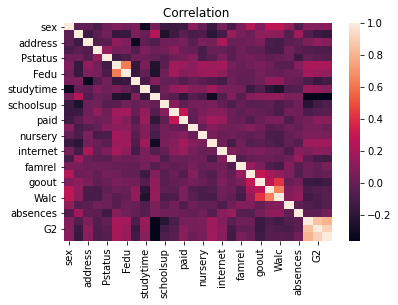

In [339]:
plt.figure(1)
sns.heatmap(math.corr())
plt.title('Correlation ')